# AI Capstone: Project 1
## *with a public image dataset*
Author: 0816066 官澔恩

Dataset Source: [Kaggle](https://www.kaggle.com/mahmoudreda55/satellite-image-classification)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split, cross_validate, ParameterGrid
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Data Preprocessing

In [2]:
data_dir = '../input/satellite-image-classification/data'
cats = ['cloudy', 'desert', 'green_area', 'water']
img_shape = (64, 64)
test_sizes = [0.2, 0.3]

data = []
labels = []

# read and resize each image
for cat_id, cat in enumerate(cats):
    cat_dir = f'{ data_dir }/{ cat }'
    for img_name in os.listdir(cat_dir):
        img = imread(f'{ cat_dir }/{ img_name }')
        img = resize(img, img_shape)
        data.append(img)
        labels.append(cat_id)

data = np.array(data)
labels = np.array(labels)

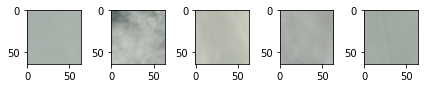

In [3]:
# display some images
fig, axes = plt.subplots(1, 5)
for idx, sample in enumerate(data[:5]):
    axes[idx].imshow(sample)
fig.tight_layout()
fig.show()

In [4]:
# flatten the array representation of each image
data = data.reshape((data.shape[0], np.prod(img_shape) * 3))

# split data into training set and testing set based on the proportion of testing set
datasets = [ train_test_split(data, labels, test_size=test_size)
             for test_size in test_sizes ]

# Models

In [5]:
# make a specified model with desired parameters
def get_model(model_type, params):
    if model_type == 'knn':
        return KNeighborsClassifier(**params)
    elif model_type == 'rf':
        return RandomForestClassifier(criterion='gini', **params)
    elif model_type == 'svm':
        return SVC(kernel='rbf', **params)
    elif model_type == 'mlp':
        return MLPClassifier(**params)
    else:
        return None

# Validation & Results

In [6]:
# display a confusion matrix and the classification report
def show_performance(y_true, y_pred):
    c_matrix = confusion_matrix(y_true, y_pred)
    c_table = pd.DataFrame(c_matrix)
    c_table.columns.name = 'truth\pred'
    display(c_table)
    
    report = classification_report(y_true, y_pred)
    print(report)

In [7]:
def show_cross_validate_report(res):
    report = pd.DataFrame({
        'fit_time': res['fit_time'],
        'score_time': res['score_time'],
        'test_score': res['test_score'],
    })
    display(report)

In [8]:
# train a model with 5-fold cross validation and validate the best model with the testing set
def train_model(model_type, param_grid, datasets):
    for test_size, dataset in zip(test_sizes, datasets):
        display(Markdown(f'### Test size: { test_size }'))
        X_train, X_test, y_train, y_test = dataset

        for params in param_grid:
            display(Markdown(f'#### { params }'))
            model = get_model(model_type, params)
            res = cross_validate(model, X_train, y_train, return_estimator=True)

            display(Markdown('#### Training Performance:'))
            show_cross_validate_report(res)

            best_model = res['estimator'][res['test_score'].argmax()]
            y_pred = best_model.predict(X_test)

            display(Markdown('#### Testing Performance:'))
            show_performance(y_test, y_pred)

## KNN

In [9]:
param_grid = ParameterGrid({
    'n_neighbors': [5, 10, 15]
})
train_model('knn', param_grid, datasets)

### Test size: 0.2

#### {'n_neighbors': 5}

#### Training Performance:

,fit_time,score_time,test_score
0,6.909155,26.964965,0.842397
1,7.059957,27.372892,0.844617
2,7.010606,28.247159,0.852386
3,7.012831,27.386326,0.867925
4,7.101176,26.723212,0.861111


#### Testing Performance:

truth\pred,0,1,2,3
0,303,3,1,5
1,13,202,0,0
2,0,0,198,108
3,4,0,7,283


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       312
           1       0.99      0.94      0.96       215
           2       0.96      0.65      0.77       306
           3       0.71      0.96      0.82       294

    accuracy                           0.87      1127
   macro avg       0.90      0.88      0.88      1127
weighted avg       0.90      0.87      0.87      1127



#### {'n_neighbors': 10}

#### Training Performance:

,fit_time,score_time,test_score
0,7.314442,27.450218,0.879023
1,7.088725,28.067042,0.863485
2,7.184245,28.507379,0.865705
3,7.195158,27.912691,0.883463
4,7.150746,27.263503,0.882222


#### Testing Performance:

truth\pred,0,1,2,3
0,301,2,3,6
1,13,202,0,0
2,0,0,216,90
3,4,0,13,277


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       312
           1       0.99      0.94      0.96       215
           2       0.93      0.71      0.80       306
           3       0.74      0.94      0.83       294

    accuracy                           0.88      1127
   macro avg       0.90      0.89      0.89      1127
weighted avg       0.90      0.88      0.88      1127



#### {'n_neighbors': 15}

#### Training Performance:

,fit_time,score_time,test_score
0,7.379425,29.370012,0.872364
1,7.261988,29.799969,0.861265
2,7.102981,30.852660,0.860155
3,7.142461,30.283862,0.879023
4,7.047954,29.366301,0.884444


#### Testing Performance:

truth\pred,0,1,2,3
0,298,2,3,9
1,13,202,0,0
2,0,0,221,85
3,4,0,14,276


              precision    recall  f1-score   support

           0       0.95      0.96      0.95       312
           1       0.99      0.94      0.96       215
           2       0.93      0.72      0.81       306
           3       0.75      0.94      0.83       294

    accuracy                           0.88      1127
   macro avg       0.90      0.89      0.89      1127
weighted avg       0.90      0.88      0.88      1127



### Test size: 0.3

#### {'n_neighbors': 5}

#### Training Performance:

,fit_time,score_time,test_score
0,6.466356,22.312558,0.851711
1,6.634458,21.881978,0.859137
2,6.481407,21.605041,0.871827
3,6.256186,23.051058,0.865482
4,6.262673,22.638373,0.861675


#### Testing Performance:

truth\pred,0,1,2,3
0,428,3,1,8
1,24,307,0,0
2,0,0,283,165
3,6,0,15,450


              precision    recall  f1-score   support

           0       0.93      0.97      0.95       440
           1       0.99      0.93      0.96       331
           2       0.95      0.63      0.76       448
           3       0.72      0.96      0.82       471

    accuracy                           0.87      1690
   macro avg       0.90      0.87      0.87      1690
weighted avg       0.89      0.87      0.87      1690



#### {'n_neighbors': 10}

#### Training Performance:

,fit_time,score_time,test_score
0,6.013532,21.981569,0.860583
1,6.200968,21.978390,0.879442
2,6.133433,21.532625,0.894670
3,6.052626,22.929959,0.879442
4,6.054897,22.754873,0.873096


#### Testing Performance:

truth\pred,0,1,2,3
0,426,3,2,9
1,23,308,0,0
2,0,0,317,131
3,6,0,26,439


              precision    recall  f1-score   support

           0       0.94      0.97      0.95       440
           1       0.99      0.93      0.96       331
           2       0.92      0.71      0.80       448
           3       0.76      0.93      0.84       471

    accuracy                           0.88      1690
   macro avg       0.90      0.88      0.89      1690
weighted avg       0.89      0.88      0.88      1690



#### {'n_neighbors': 15}

#### Training Performance:

,fit_time,score_time,test_score
0,6.059899,22.756212,0.871990
1,6.054838,22.370826,0.871827
2,6.207563,21.764086,0.879442
3,6.076301,23.400404,0.878173
4,6.118039,23.303702,0.865482


#### Testing Performance:

truth\pred,0,1,2,3
0,420,6,2,12
1,22,309,0,0
2,0,0,312,136
3,6,0,27,438


              precision    recall  f1-score   support

           0       0.94      0.95      0.95       440
           1       0.98      0.93      0.96       331
           2       0.91      0.70      0.79       448
           3       0.75      0.93      0.83       471

    accuracy                           0.88      1690
   macro avg       0.90      0.88      0.88      1690
weighted avg       0.89      0.88      0.87      1690



## Random Forest

In [10]:
param_grid = ParameterGrid({
    'min_samples_leaf': [1, 5, 10]
})
train_model('rf', param_grid, datasets)

### Test size: 0.2

#### {'min_samples_leaf': 1}

#### Training Performance:

,fit_time,score_time,test_score
0,17.140742,0.055124,0.945616
1,17.735019,0.056293,0.936737
2,16.806801,0.056260,0.927858
3,17.438885,0.057299,0.942286
4,17.780403,0.062281,0.943333


#### Testing Performance:

truth\pred,0,1,2,3
0,300,5,4,3
1,7,208,0,0
2,0,0,289,17
3,4,0,26,264


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       312
           1       0.98      0.97      0.97       215
           2       0.91      0.94      0.92       306
           3       0.93      0.90      0.91       294

    accuracy                           0.94      1127
   macro avg       0.94      0.94      0.94      1127
weighted avg       0.94      0.94      0.94      1127



#### {'min_samples_leaf': 5}

#### Training Performance:

,fit_time,score_time,test_score
0,15.236142,0.055635,0.940067
1,15.530308,0.054039,0.930078
2,15.274745,0.053808,0.918979
3,15.490820,0.054831,0.935627
4,15.479985,0.054939,0.940000


#### Testing Performance:

truth\pred,0,1,2,3
0,297,7,5,3
1,6,209,0,0
2,0,0,286,20
3,4,0,31,259


              precision    recall  f1-score   support

           0       0.97      0.95      0.96       312
           1       0.97      0.97      0.97       215
           2       0.89      0.93      0.91       306
           3       0.92      0.88      0.90       294

    accuracy                           0.93      1127
   macro avg       0.94      0.93      0.93      1127
weighted avg       0.93      0.93      0.93      1127



#### {'min_samples_leaf': 10}

#### Training Performance:

,fit_time,score_time,test_score
0,14.037864,0.054318,0.937847
1,14.299821,0.052675,0.920089
2,13.880008,0.051817,0.910100
3,14.143221,0.054378,0.928968
4,14.205851,0.051876,0.932222


#### Testing Performance:

truth\pred,0,1,2,3
0,293,8,6,5
1,9,206,0,0
2,0,0,287,19
3,4,0,35,255


              precision    recall  f1-score   support

           0       0.96      0.94      0.95       312
           1       0.96      0.96      0.96       215
           2       0.88      0.94      0.91       306
           3       0.91      0.87      0.89       294

    accuracy                           0.92      1127
   macro avg       0.93      0.93      0.93      1127
weighted avg       0.92      0.92      0.92      1127



### Test size: 0.3

#### {'min_samples_leaf': 1}

#### Training Performance:

,fit_time,score_time,test_score
0,14.494690,0.055326,0.934094
1,15.141070,0.056842,0.927665
2,14.815149,0.055517,0.941624
3,14.526676,0.055123,0.934010
4,14.728537,0.053654,0.945431


#### Testing Performance:

truth\pred,0,1,2,3
0,418,12,4,6
1,20,311,0,0
2,0,0,419,29
3,6,0,34,431


              precision    recall  f1-score   support

           0       0.94      0.95      0.95       440
           1       0.96      0.94      0.95       331
           2       0.92      0.94      0.93       448
           3       0.92      0.92      0.92       471

    accuracy                           0.93      1690
   macro avg       0.94      0.93      0.94      1690
weighted avg       0.93      0.93      0.93      1690



#### {'min_samples_leaf': 5}

#### Training Performance:

,fit_time,score_time,test_score
0,12.763947,0.053510,0.934094
1,13.026089,0.056294,0.927665
2,12.817589,0.053909,0.934010
3,12.977811,0.053465,0.932741
4,13.317619,0.054029,0.937817


#### Testing Performance:

truth\pred,0,1,2,3
0,414,12,3,11
1,18,313,0,0
2,0,0,420,28
3,7,0,39,425


              precision    recall  f1-score   support

           0       0.94      0.94      0.94       440
           1       0.96      0.95      0.95       331
           2       0.91      0.94      0.92       448
           3       0.92      0.90      0.91       471

    accuracy                           0.93      1690
   macro avg       0.93      0.93      0.93      1690
weighted avg       0.93      0.93      0.93      1690



#### {'min_samples_leaf': 10}

#### Training Performance:

,fit_time,score_time,test_score
0,11.883036,0.053667,0.930292
1,12.167593,0.053501,0.918782
2,12.065209,0.052727,0.925127
3,12.029763,0.053118,0.934010
4,12.059983,0.053223,0.937817


#### Testing Performance:

truth\pred,0,1,2,3
0,413,12,8,7
1,22,309,0,0
2,0,0,418,30
3,7,0,42,422


              precision    recall  f1-score   support

           0       0.93      0.94      0.94       440
           1       0.96      0.93      0.95       331
           2       0.89      0.93      0.91       448
           3       0.92      0.90      0.91       471

    accuracy                           0.92      1690
   macro avg       0.93      0.93      0.93      1690
weighted avg       0.92      0.92      0.92      1690



## SVM

In [11]:
param_grid = ParameterGrid({
    'C': [1, 5, 10]
})
train_model('svm', param_grid, datasets)

### Test size: 0.2

#### {'C': 1}

#### Training Performance:

,fit_time,score_time,test_score
0,58.881912,26.125457,0.917869
1,57.969871,25.371868,0.902331
2,57.048775,24.945662,0.899001
3,59.565141,26.043292,0.925638
4,59.133307,26.093638,0.913333


#### Testing Performance:

truth\pred,0,1,2,3
0,293,13,3,3
1,10,205,0,0
2,0,0,287,19
3,5,0,56,233


              precision    recall  f1-score   support

           0       0.95      0.94      0.95       312
           1       0.94      0.95      0.95       215
           2       0.83      0.94      0.88       306
           3       0.91      0.79      0.85       294

    accuracy                           0.90      1127
   macro avg       0.91      0.91      0.91      1127
weighted avg       0.91      0.90      0.90      1127



#### {'C': 5}

#### Training Performance:

,fit_time,score_time,test_score
0,44.114001,19.188753,0.933407
1,42.732123,18.278949,0.917869
2,42.419364,18.152146,0.912320
3,43.682128,18.656748,0.930078
4,44.569180,19.003965,0.923333


#### Testing Performance:

truth\pred,0,1,2,3
0,294,12,3,3
1,7,208,0,0
2,0,0,288,18
3,5,0,50,239


              precision    recall  f1-score   support

           0       0.96      0.94      0.95       312
           1       0.95      0.97      0.96       215
           2       0.84      0.94      0.89       306
           3       0.92      0.81      0.86       294

    accuracy                           0.91      1127
   macro avg       0.92      0.92      0.92      1127
weighted avg       0.92      0.91      0.91      1127



#### {'C': 10}

#### Training Performance:

,fit_time,score_time,test_score
0,40.838034,17.824231,0.933407
1,40.328843,17.545758,0.923418
2,39.296603,16.772501,0.912320
3,40.891227,17.629699,0.933407
4,41.905901,17.870696,0.928889


#### Testing Performance:

truth\pred,0,1,2,3
0,296,11,2,3
1,6,209,0,0
2,0,0,287,19
3,5,0,49,240


              precision    recall  f1-score   support

           0       0.96      0.95      0.96       312
           1       0.95      0.97      0.96       215
           2       0.85      0.94      0.89       306
           3       0.92      0.82      0.86       294

    accuracy                           0.92      1127
   macro avg       0.92      0.92      0.92      1127
weighted avg       0.92      0.92      0.92      1127



### Test size: 0.3

#### {'C': 1}

#### Training Performance:

,fit_time,score_time,test_score
0,45.983933,19.678368,0.913815
1,45.972899,19.418947,0.908629
2,45.897609,19.577275,0.912437
3,45.100677,19.212779,0.908629
4,45.935148,19.416606,0.911168


#### Testing Performance:

truth\pred,0,1,2,3
0,406,24,4,6
1,17,314,0,0
2,0,0,424,24
3,7,0,88,376


              precision    recall  f1-score   support

           0       0.94      0.92      0.93       440
           1       0.93      0.95      0.94       331
           2       0.82      0.95      0.88       448
           3       0.93      0.80      0.86       471

    accuracy                           0.90      1690
   macro avg       0.91      0.90      0.90      1690
weighted avg       0.90      0.90      0.90      1690



#### {'C': 5}

#### Training Performance:

,fit_time,score_time,test_score
0,34.348648,14.440399,0.927757
1,35.084842,14.607815,0.922589
2,34.920791,14.503210,0.921320
3,34.395420,14.272921,0.923858
4,34.831992,14.521480,0.920051


#### Testing Performance:

truth\pred,0,1,2,3
0,411,19,3,7
1,14,317,0,0
2,0,0,425,23
3,5,0,72,394


              precision    recall  f1-score   support

           0       0.96      0.93      0.94       440
           1       0.94      0.96      0.95       331
           2       0.85      0.95      0.90       448
           3       0.93      0.84      0.88       471

    accuracy                           0.92      1690
   macro avg       0.92      0.92      0.92      1690
weighted avg       0.92      0.92      0.92      1690



#### {'C': 10}

#### Training Performance:

,fit_time,score_time,test_score
0,32.424899,13.489229,0.930292
1,32.748739,13.401031,0.921320
2,32.260012,13.192006,0.918782
3,31.995751,13.236769,0.927665
4,32.641136,13.569405,0.928934


#### Testing Performance:

truth\pred,0,1,2,3
0,412,18,3,7
1,13,318,0,0
2,1,0,424,23
3,5,0,74,392


              precision    recall  f1-score   support

           0       0.96      0.94      0.95       440
           1       0.95      0.96      0.95       331
           2       0.85      0.95      0.89       448
           3       0.93      0.83      0.88       471

    accuracy                           0.91      1690
   macro avg       0.92      0.92      0.92      1690
weighted avg       0.92      0.91      0.91      1690



## MLP

In [12]:
param_grid = ParameterGrid({
    'hidden_layer_sizes': [256, 512, 1024]
})
train_model('mlp', param_grid, datasets)

### Test size: 0.2

#### {'hidden_layer_sizes': 256}

#### Training Performance:

,fit_time,score_time,test_score
0,222.405706,0.103877,0.795782
1,228.592775,0.105958,0.794673
2,128.561855,0.105999,0.801332
3,106.402186,0.105618,0.784684
4,150.207076,0.104018,0.848889


#### Testing Performance:

truth\pred,0,1,2,3
0,274,33,0,5
1,10,205,0,0
2,0,0,294,12
3,11,0,86,197


              precision    recall  f1-score   support

           0       0.93      0.88      0.90       312
           1       0.86      0.95      0.91       215
           2       0.77      0.96      0.86       306
           3       0.92      0.67      0.78       294

    accuracy                           0.86      1127
   macro avg       0.87      0.87      0.86      1127
weighted avg       0.87      0.86      0.86      1127



#### {'hidden_layer_sizes': 512}

#### Training Performance:

,fit_time,score_time,test_score
0,242.723284,0.187433,0.803552
1,262.074814,0.187593,0.833518
2,219.399063,0.187109,0.755827
3,170.104743,0.184399,0.834628
4,212.661299,0.190020,0.767778


#### Testing Performance:

truth\pred,0,1,2,3
0,264,22,1,25
1,34,181,0,0
2,0,0,298,8
3,0,0,110,184


              precision    recall  f1-score   support

           0       0.89      0.85      0.87       312
           1       0.89      0.84      0.87       215
           2       0.73      0.97      0.83       306
           3       0.85      0.63      0.72       294

    accuracy                           0.82      1127
   macro avg       0.84      0.82      0.82      1127
weighted avg       0.83      0.82      0.82      1127



#### {'hidden_layer_sizes': 1024}

#### Training Performance:

,fit_time,score_time,test_score
0,709.230530,0.347266,0.859046
1,598.197142,0.350236,0.822420
2,166.508604,0.349804,0.622642
3,532.557191,0.347670,0.809101
4,510.259148,0.351979,0.843333


#### Testing Performance:

truth\pred,0,1,2,3
0,272,26,0,14
1,20,195,0,0
2,0,0,279,27
3,1,0,70,223


              precision    recall  f1-score   support

           0       0.93      0.87      0.90       312
           1       0.88      0.91      0.89       215
           2       0.80      0.91      0.85       306
           3       0.84      0.76      0.80       294

    accuracy                           0.86      1127
   macro avg       0.86      0.86      0.86      1127
weighted avg       0.86      0.86      0.86      1127



### Test size: 0.3

#### {'hidden_layer_sizes': 256}

#### Training Performance:

,fit_time,score_time,test_score
0,210.265954,0.093566,0.877060
1,203.932407,0.094302,0.868020
2,200.617007,0.094378,0.885787
3,137.457891,0.094469,0.810914
4,144.234970,0.108538,0.854061


#### Testing Performance:

truth\pred,0,1,2,3
0,388,41,0,11
1,16,315,0,0
2,0,0,400,48
3,8,0,98,365


              precision    recall  f1-score   support

           0       0.94      0.88      0.91       440
           1       0.88      0.95      0.92       331
           2       0.80      0.89      0.85       448
           3       0.86      0.77      0.82       471

    accuracy                           0.87      1690
   macro avg       0.87      0.88      0.87      1690
weighted avg       0.87      0.87      0.87      1690



#### {'hidden_layer_sizes': 512}

#### Training Performance:

,fit_time,score_time,test_score
0,189.577012,0.166333,0.856781
1,308.873586,0.164412,0.850254
2,248.302670,0.162004,0.869289
3,370.388589,0.169707,0.859137
4,314.831467,0.164211,0.865482


#### Testing Performance:

truth\pred,0,1,2,3
0,395,41,0,4
1,14,317,0,0
2,0,0,426,22
3,18,0,141,312


              precision    recall  f1-score   support

           0       0.93      0.90      0.91       440
           1       0.89      0.96      0.92       331
           2       0.75      0.95      0.84       448
           3       0.92      0.66      0.77       471

    accuracy                           0.86      1690
   macro avg       0.87      0.87      0.86      1690
weighted avg       0.87      0.86      0.85      1690



#### {'hidden_layer_sizes': 1024}

#### Training Performance:

,fit_time,score_time,test_score
0,372.504282,0.325069,0.802281
1,443.603309,0.323414,0.862944
2,733.575724,0.678014,0.869289
3,751.729655,0.317685,0.852792
4,393.214366,0.326566,0.862944


#### Testing Performance:

truth\pred,0,1,2,3
0,394,39,0,7
1,35,296,0,0
2,0,0,355,93
3,14,0,59,398


              precision    recall  f1-score   support

           0       0.89      0.90      0.89       440
           1       0.88      0.89      0.89       331
           2       0.86      0.79      0.82       448
           3       0.80      0.85      0.82       471

    accuracy                           0.85      1690
   macro avg       0.86      0.86      0.86      1690
weighted avg       0.85      0.85      0.85      1690

